In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
data = pd.read_csv("./data.csv")
data.head()

,Width,Length,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Width   100 non-null    float64
 1   Length  100 non-null    float64
 2   Result  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [108]:
X = data[['Width', 'Length']]
Y = data['Result']

In [109]:
X.shape, Y.shape

((100, 2), (100,))

In [110]:
n_samples = X.shape[0]
n_samples

100

In [111]:
# vector [1, X] as bias
X = np.hstack([np.ones((n_samples, 1)), X])
X

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331],
       [ 1.        , 95.86155507, 38.22527806],
       [ 1.        , 75.01365839, 30.60326323],
       [ 1.        , 82.30705337, 76.4819633 ],
       [ 1.        , 69.36458876, 97.71869196],
       [ 1.        , 39.53833914, 76.03681085],
       [ 1.        , 53.97105215, 89.20735014],
       [ 1.        , 69.07014406, 52.74046973],
       [ 1.        , 67.94685548, 46.67857411],
       [ 1.        , 70.66150955, 92.92713789],
       [ 1.        , 76.97878373, 47.57596365],
       [ 1.        , 67.37202755, 42.838

In [112]:
n_features = X.shape[-1]
theta = np.random.rand(n_features)
theta

array([0.41242043, 0.3936244 , 0.75979581])

In [113]:
def logistic_function(x):
  return 1/ (1 + np.exp(-x))

def predict(x, theta):
  z = np.dot(x , theta)
  y_pred = logistic_function(z)
  return y_pred

def compute_cost(y_pred, y):
  cost = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)).mean()
  return cost

def compute_gradient(x, y, y_pred):
  m = len(y)
  gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
  return gradient

def update_weight(theta, lr, gradient):
  new_theta = theta - lr*gradient
  return new_theta

In [114]:
# param
n_epochs = 100
lr = 0.001

losses = []
for epoch in range(n_epochs):
  # get all the samples
  x = X
  y = Y

  # predict y_hat
  y_pred = predict(x, theta)

  # compute loss
  loss = compute_cost(y_pred, y)
  losses.append(loss)

  # compute gradient
  gradient = compute_gradient(x, y, y_pred)

  # update weights
  theta = update_weight(theta, lr, gradient)

theta, losses

/tmp/ipykernel_11796/3780893146.py:10: RuntimeWarning: divide by zero encountered in log
  cost = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)).mean()
/tmp/ipykernel_11796/3780893146.py:10: RuntimeWarning: divide by zero encountered in log
  cost = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)).mean()
/tmp/ipykernel_11796/3780893146.py:10: RuntimeWarning: divide by zero encountered in log
  cost = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)).mean()
/tmp/ipykernel_11796/3780893146.py:10: RuntimeWarning: divide by zero encountered in log
  cost = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)).mean()
/tmp/ipykernel_11796/3780893146.py:10: RuntimeWarning: divide by zero encountered in log
  cost = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)).mean()
/tmp/ipykernel_11796/3780893146.py:10: RuntimeWarning: divide by zero encountered in log
  cost = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)).mean()
/tmp/ipykernel_11796/3780893146.py:10: Runtime

(array([ 0.39623748,  0.00660214, -0.00156325]),
 [0    -inf
  1    -inf
  2    -inf
  3    -inf
  4    -inf
       ... 
  95   -inf
  96   -inf
  97   -inf
  98   -inf
  99   -inf
  Name: Result, Length: 100, dtype: float64,
  0    -inf
  1    -inf
  2    -inf
  3    -inf
  4    -inf
       ... 
  95   -inf
  96   -inf
  97   -inf
  98   -inf
  99   -inf
  Name: Result, Length: 100, dtype: float64,
  0    -inf
  1    -inf
  2    -inf
  3    -inf
  4    -inf
       ... 
  95   -inf
  96   -inf
  97   -inf
  98   -inf
  99   -inf
  Name: Result, Length: 100, dtype: float64,
  0    -inf
  1    -inf
  2    -inf
  3    -inf
  4    -inf
       ... 
  95   -inf
  96   -inf
  97   -inf
  98   -inf
  99   -inf
  Name: Result, Length: 100, dtype: float64,
  0    -inf
  1    -inf
  2    -inf
  3    -inf
  4    -inf
       ... 
  95   -inf
  96   -inf
  97   -inf
  98   -inf
  99   -inf
  Name: Result, Length: 100, dtype: float64,
  0    -inf
  1    -inf
  2    -inf
  3    -inf
  4    -inf
      

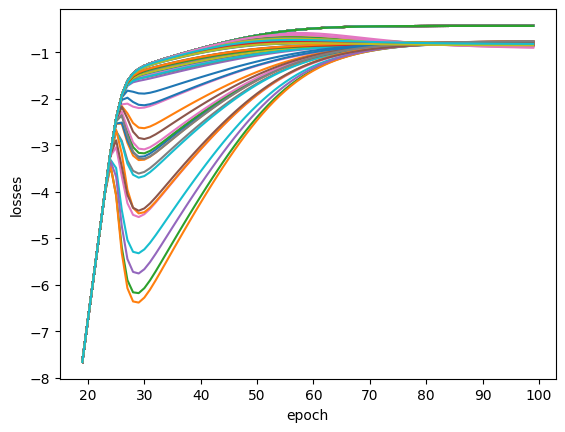

In [115]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.show()

In [116]:
Y_preds = predict(X, theta)

In [117]:
thresholds = [0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
accs = []
for threshold in thresholds:
  Y_pred_ths = []
  for y_pred in Y_preds:
    if y_pred >= threshold:
      Y_pred_ths.append(1)
    else:
      Y_pred_ths.append(0)

  Y_pred_ths = np.array(Y_pred_ths)
  acc = sum(Y == Y_pred_ths)/len(Y)
  accs.append(acc)
accs

[0.6, 0.6, 0.6, 0.6, 0.72, 0.55, 0.4, 0.4]